## IMAGE BINARIZATION FOR HANDWRITING OCR

v4 - EDA - Ross Kimberlin - 6/7/2022

(SEE https://github.com/ross-k/Image-Binarization-for-Handwriting-OCR/tree/ross-test/notebooks)

In [44]:
import cv2
import glob
import imageio as imi
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import misc, ndimage
from scipy import misc, ndimage
from sklearn.metrics import accuracy_score, f1_score
#    classification_report, confusion_matrix, 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

%matplotlib inline

## STEP 1) READ IMAGES INTO PYTHON AND INSPECT

### H-DIBCO DATA SET

In [2]:
read_dir_DIBCO_GT = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/'

In [3]:
read_dir_DIBCO    = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/'

In [4]:
DIBCO_GT = []
DIBCO_orig = []

for file in sorted(glob.glob(read_dir_DIBCO_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_GT.append(cv2.imread(file,
                               cv2.IMREAD_GRAYSCALE))
    
for file in sorted(glob.glob(read_dir_DIBCO + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_orig.append(cv2.imread(file,
                               cv2.IMREAD_GRAYSCALE))

In [5]:
sorted(glob.glob(read_dir_DIBCO_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/1_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/2_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/3_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/4_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/5_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/6_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/7_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/8_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/9_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/10_gt.bmp']

In [6]:
sorted(glob.glob(read_dir_DIBCO + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/1.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/2.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/3.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/4.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/5.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/6.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/7.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/8.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/9.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp']

## STEP 2) TRAINING

#### USING DIBCO DATA FIRST

In [7]:
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(DIBCO_orig,
                                                            DIBCO_GT,
                                                            train_size = 0.75,
                                                            test_size = 0.25,
                                                            random_state = 321)

#### TRYING WITH accuracy_score FIRST.  MICHAEL SAYS THAT AN f1 SCORE WILL WORK BETTER WHEN THERE ARE MORE BACKGROUND THAN FOREGROUND PIXELS, AND THAT GALLEGO & CALVO-ZARAGOZA SAY THAT A LARGER WINDOW SIZE SEEMS TO PRODUCE A BETTER f1 SCORE.

In [9]:
def thresh_acc_D(thresh):
   
    accuracies_DIBCO = []

    for ground_truth, original in zip(y_train_D, X_train_D):
        
        # KEEPS THE SECOND ELEMENT OF A TUPLE
        _, predicted = cv2.threshold(original,
                                     thresh, 255, 
                                     cv2.THRESH_BINARY)
        
        # COMPUTE ACCURACY SCORES ACROSS TRAINING DATA
        accuracies_DIBCO.append(accuracy_score(ground_truth.flatten(),
                                               predicted.flatten()))
    
    # AVERAGE ACCURACY SCORES
    return np.mean(accuracies_DIBCO) 

In [ ]:
thresh_acc_D(160)

In [10]:
accs_D = []

for thresh in range(0, 255):
    
    accs_D.append(thresh_acc_D(thresh))

In [11]:
np.asarray(accs_D).max()

0.9719764300186599

In [12]:
np.asarray(accs_D).argmax()

121

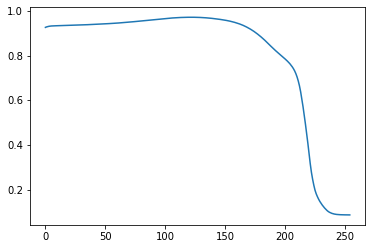

In [13]:
plt.plot(accs_D);

In [14]:
# img = DIBCO_orig # [0]
# img

In [15]:
window_size = 64

In [17]:
# img[0:window_size, 
#     0:window_size ]

In [ ]:
# img[0:window_size, 
#     0:window_size ].shape

In [ ]:
# plt.imshow(img[0:window_size, 
#                0:window_size, ]);

In [ ]:
# img.shape

In [18]:
def arr_div(img):

    cont = []
    
    idx_row_start_n = 0
    idx_col_start_n = 0
    
    im_size = img.shape
    
    # // GIVES YOU INTEGER DIVISION
    n_windows_tall = im_size[0] // window_size
    n_windows_wide = im_size[1] // window_size
    
    for idx_row_start_n in range(n_windows_tall):
    
        for idx_col_start_n in range(n_windows_wide):
            
            window = img[window_size * idx_row_start_n: \
                                     window_size * (idx_row_start_n + 1), 
                window_size * idx_col_start_n: window_size * (idx_col_start_n + 1)]
    
            window = np.divide(window, 255)
        
            cont.append(window)
    
    return cont

In [19]:
X = []

for img in DIBCO_orig:
    
    # extend CREATES ONE LONG LIST INSTEAD OF SEVERAL LISTS
    X.extend(arr_div(img))

In [20]:
X = np.array(X)

In [21]:
y = []

for img in DIBCO_GT:
    
    # CREATES ONE LONG LIST INSTEAD OF SEVERAL LISTS
    y.extend(arr_div(img))

In [22]:
y = np.array(y)

In [23]:
window = arr_div(img)

In [24]:
window

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 arr

In [ ]:
# img_GT = DIBCO_GT[0]

In [26]:
# arr_div(img_GT)

In [27]:
len(X)

2979

In [28]:
X[0].shape

(64, 64)

### STEP 3) KERAS MODEL - THE MOMENT YOU HAVE BEEN WAITING FOR

In [29]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape = (window_size, window_size, 1)),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),                       
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),      
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),                       
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
        tf.keras.layers.Conv2D(1, 
                               kernel_size=(3, 3), 
                               strides=1, 
                               padding='same', 
                               activation='sigmoid')                     
    ]
)

model.summary()

model.compile('rmsprop', 
              'binary_crossentropy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        0

In [30]:
model.fit(X, y,
          epochs = 10)

Epoch 1/10
94/94 [==============================] - 66s 694ms/step - loss: 0.0987
Epoch 2/10
94/94 [==============================] - 64s 683ms/step - loss: 0.0547
Epoch 3/10
94/94 [==============================] - 63s 672ms/step - loss: 0.0444
Epoch 4/10
94/94 [==============================] - 63s 673ms/step - loss: 0.0416
Epoch 5/10
94/94 [==============================] - 63s 675ms/step - loss: 0.0378
Epoch 6/10
94/94 [==============================] - 67s 710ms/step - loss: 0.0343
Epoch 7/10
94/94 [==============================] - 63s 669ms/step - loss: 0.0418
Epoch 8/10
94/94 [==============================] - 63s 668ms/step - loss: 0.0331
Epoch 9/10
94/94 [==============================] - 63s 668ms/step - loss: 0.0319
Epoch 10/10
94/94 [==============================] - 63s 668ms/step - loss: 0.0309


In [31]:
predictions = model.predict(X)

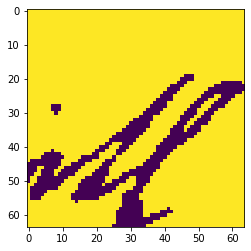

In [32]:
plt.imshow(y[- 1])

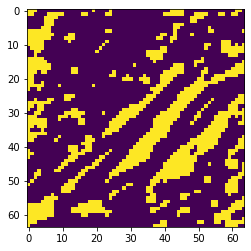

In [33]:
plt.imshow(predictions[- 1] > 0.5)

In [34]:
predictions.max()

0.99998736

In [35]:
predictions.min()

9.87738e-18

In [39]:
len(y_test_D)

3

In [40]:
len(y)

2979

In [41]:
len(X_test_D)

3

In [42]:
len(predictions)

2979

In [43]:
print(classification_report(y, 
                            predictions))

ValueError: unknown is not supported

## THEN STEP 5) FINISH TWEAKING PRE-PROCESSING & RE-ITERATE

#### (e.g. USE GAUSSIAN BLUR?  WHICH DE-NOISING, AND AFTER vs BEFORE, IMAGE SEGMENTATION, etc.)